# Estimate pi
Write a program that estimates the value of pi by the 'throw darts at a wall'
   method.  That is, generate random `(x,y)` points inside a square and see how many of these fall in the circle that has for diameter the length of the side of the square in which coordinates were generated. The ratio of the number of points in the circle to the number of points in the square should allow you to estimate pi.  For this exercise,
   make a module called `pi_estimate.py` within a `day2/exercises/yourname` folder.
   Besides these instructions,
   I will not give any more requirements to how you structure this exercise.
   You may want to start with just writing functions and then at some point
   reorganize into an object-oriented design.

* Do this estimate using 100, 1000, 10,000, and 1e6 points.
* How long does the calculation take for different numbers of points?  Make a figure that illustrates how the calculation time depends on the number of points.      
* Make a figure that displays the "darts."
* Run this calculation many times for a single `N` (number of darts), and plot a histogram of the results.  What is the mean and standard deviation of these estimates?
* Make a plot that illustrates the precision of the pi estimate as a function of number of random points used.

Make a notebook that demonstrates how your `pi_estimate` module works, as
    well as presenting the results of all your calculations.  The notebook
    should have minimal complicated code in it; rather, it should initialize
    objects and call functions defined within the `pi_estimate` module.
If you want to see and see again the explanation for the throwing dart technique, here is a nice explanatory video https://youtu.be/M34TO71SKGk (all is in the first minute of the video)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

In [81]:
def darts(N):
    """
    Throws N darts
    N : number of darts
    Returns randomly generated x and y coordinates
    
    """
    x = np.random.rand(N)
    y = np.random.rand(N)
    return x,y

In [82]:
def estimate_pi(N):
    """
    Returns a value for the estimate of pi
    N: number of darts
    
    """
    x,y = darts(N)
    r = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
    r_bool = (r <= 0.5)
    pi_estimate = (np.sum(r_bool) / N) * 4
    return pi_estimate

In [83]:
def plot_circle(xcenter,ycenter,radius):
    
    """
    Plots a circle
    xcenter: x coordinate of the center
    ycenter: y coordinate of the center
    radius: radius of the circle
    
    """
    theta = np.linspace(0, 2 * np.pi, 1000)
    xpoints = radius* np.cos(theta) + xcenter
    ypoints = radius * np.sin(theta) + ycenter
    plt.plot(xpoints,ypoints, 'k')

In [86]:
def timer(function, argument):
    
    """
    Times a function with one argument
    function: name of the function that will be timed
    argument: argument that will be used to evaluate the function
    returns a time in seconds
    
    """
    start_time = time.time()
    function(argument)
    end_time = time.time()
    return end_time - start_time

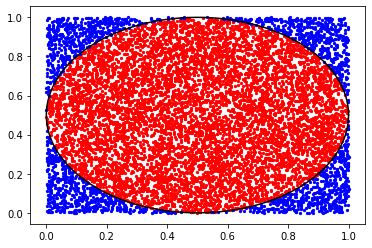

In [89]:
N = 10000
x,y = darts(N)
r = np.sqrt((x - 0.5)**2 + (y - 0.5)**2)
plt.scatter(x[r < 0.5],y[r < 0.5], s = 5, c = 'r')
plt.scatter(x[r > 0.5],y[r > 0.5], s = 5, c = 'b')
plot_circle(0.5, 0.5, 0.5)

Text(0, 0.5, 'Execution Time(s)')

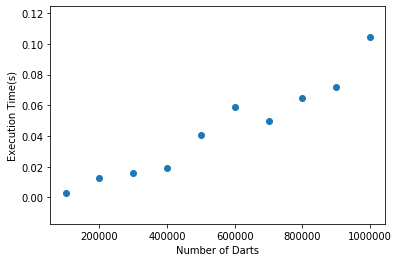

In [79]:
N = 100000 * np.arange(1,11)
times = []
estimate_precision = []

for n in N:
    times.append(timer(estimate_pi, n))
    estimate_precision.append((abs(np.pi - estimate_pi(n)) / np.pi) *100)

plt.scatter(N,times)
plt.xlabel("Number of Darts")
plt.ylabel("Execution Time(s)")

Text(0, 0.5, 'Percent Error')

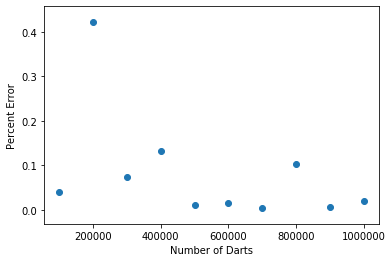

In [80]:
plt.scatter(N,estimate_precision)
plt.xlabel("Number of Darts")
plt.ylabel("Percent Error")

Mean: 3.1427200000000006
Standard Deviation: 0.05206420651464885


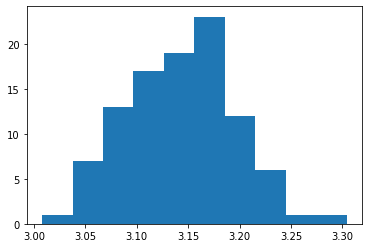

In [75]:
N = 1000

estimates = []
repeats = 100

for i in range(100):
    estimates.append(estimate_pi(N))

plt.hist(estimates)
plt.xlabel("Pi Estimate")
plt.ylabel("Frequency")
print("Mean: " + str(np.mean(estimates)))
print("Standard Deviation: " + str(np.std(estimates)))
